In [8]:
] activate .

In [9]:
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Images

In [10]:
using MLDatasets
# load full training set
train_x, train_y = CIFAR10.traindata();
train_y = onehotbatch(train_y, 0:9);
# load full test set
test_x,  test_y  = CIFAR10.testdata();
test_y = onehotbatch(test_y, 0:9);

In [11]:
float2RGB(img)= colorview(RGB,PermutedDimsArray(train_x[:,:,:,6],[3,2,1]))


float2RGB (generic function with 1 method)

In [12]:
function shiftToLeft(img, n)
    r, g, b = img[:, n+1:end, 1], img[:, n+1:end, 2], img[:, n+1:end, 3]
    r_shift = hcat(r, zeros(size(img, 1), n))
    g_shift = hcat(g, zeros(size(img, 1), n))
    b_shift = hcat(b, zeros(size(img, 1), n))
    shifted_img = zeros(size(img, 1), size(img, 2), 3)
    shifted_img[:, :, 1] = r_shift
    shifted_img[:, :, 2] = g_shift
    shifted_img[:, :, 3] = b_shift
    shifted_img
end

shiftToLeft (generic function with 1 method)

In [13]:
function rotate_right(img)
    r, g, b = img[:, :, 1], img[:, :, 2], img[:, :, 3]
    rotated_img = zeros(size(img, 1), size(img, 2), 3)
    rotated_img[:, :, 1] = r'
    rotated_img[:, :, 2] = g'
    rotated_img[:, :, 3] = b'
    rotated_img
end

rotate_right (generic function with 1 method)

# At this point!

**Q1:** In one line of code: Extract the last 250 from CIFAR training set and store them into X_CNN


**Q2:** In one line of code: Extract their corresponding classes and store them into Y_CNN


**Q3:** How many classes are there the last 250 samples? Write code that extract the number. 


**Q4:** How what does each class stand for? (e.g. 1. Horse, 2. Cars...etc) Write code how you display a sample image from each class. 


# CNN

In [14]:

m = Chain(
    Conv((2,2), 3=>16, relu),
    x -> maxpool(x, (2,2)), # maxpool default stride = k e.g. (2,2)
    x -> reshape(x, :, size(x, 4)),
    Dense(3600, 10), 
    softmax
)
loss(x, y) = crossentropy(m(x), y)
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))

function train_CNN(X, Y, dataset)
    evalcb = throttle(() -> @show(accuracy(X, Y)), 10)
    opt = ADAM(params(m))
    Flux.train!(loss, dataset, opt, cb = evalcb)
end

function test_CNN(X, Y)
    accuracy(X, Y)
end

test_CNN (generic function with 1 method)

# At this point!

**Q5** In 3 lines of code: Run the CNN model on X_CNN and Y_CNN using 150 iterations and using train_CNN function
_Note:_ we need 3 lines because CNN will fire an error and we have to make some pre-processing over the input first





**Q6:** In 4 lines of code: Get the 5th image and its class from the training data then test if the CNN will recognize it or not (and in case that CNN did't recognize the true class, select any other image that CNN will correctlt classify so you will be able to run all below questions). Finally,plot the selected image





In [15]:
w1 = params(m)[1];

In [16]:
function my_init(k1,k2,ch1,ch2)
    Tracker.data(w1)
end


my_init (generic function with 1 method)

In [17]:
m_final = Chain(
    Conv((2,2), 3=>16, relu, init= my_init),
    x -> maxpool(x, (2,2))
)

Chain(Conv((2, 2), 3=>16, NNlib.relu), getfield(Main, Symbol("##9#10"))())

In [18]:
function displayChannels(output_conv)
    imgChannels=[]
    for j=1:size(output_conv, 3)
        ch = output_conv[:, :, j];
        imgrgb = convert(Array{ColorTypes.Gray,2}, Tracker.data(ch))
        push!(imgChannels,imgrgb)
    end
    [imgChannels...]
end

displayChannels (generic function with 1 method)

,,,,,,,,,,,,,,,

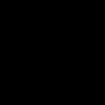
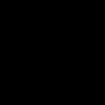
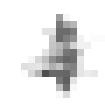
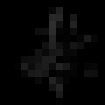
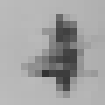
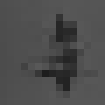
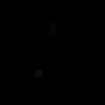
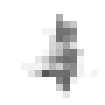
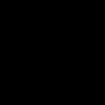
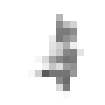
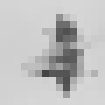
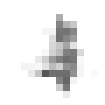
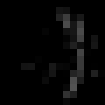
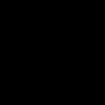
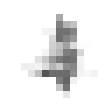
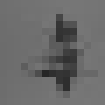

In [15]:
output_conv = m_final(test_example_x);
displayChannels(output_conv)

# At this point!

**Q7:** In 2 lines of code, get the optimal w and b of the dense layer obtained from our convolutional model(m)
    and call them dense_layer_w and dense_layer_b





**Q8:** After we have the "output_conv" which is the result of conv + max_pool layers, we need to make a new chain
    like m_final but this time it will be named "m_final_2", it will be responsible for 3 things:
     1. reshaping the input(which will be output_conv later when we will call it)
     2. creating the dense layer of size = the_reshaped_input * 10.. The dense layer should be initlized by the 
        dense_layer_w and dense_layer_b which you get above
     3. a softmax layer
 Note to do the second step above for initilization: write first two functions below (like my_init used before)
 and you can know the number of parameters sent to these functions if you checked the implementation
 of Dense layer at the flux github
 write below first function






write below second function





Then below write your model m_final_2 using the two functions that you just wrote and let the first parameter to
Dense layer to be named "n" and "n" will depends on another variable named "num_channels" which should
be initially set to 16 (we will set it later by different values at each run):





**Q9:** Now, in one line of code we will set num_channels with 16
  then will call the m_final_2 and pass to it the output_conv of all the 16 channels






**Q10:** In one line of code: Get the class output of the above call(the maximum propability output from the softmax) ..
 it should indicate class 1 (because we are using all the 16 channels as they are)







**Q11:** Repeat Question 7 but set the num_channels=4 and update the n and also create a new chain 
 named m_final_3 (to get use of the new dimensions set in the n)
 Now the input to m_final_3 will be the first 10 channels only




**Q12:** get the output class of the above call and see if it is not 1 (we are now testing the effect of channels)
on the last decision of the CNN





**Q13:** To deterime which channel has great effect on the classification:
1. Make a loop from 1 to 16
2. at each time, ignore one channel and consider the remainings (for example: at i=2, we will take the channels number 1,3,4,5,6,7,... till 16)
3. then create a new chain that will take the new n value based on the selected channels
4. then call it using your test example and check if it still sees the right class or not
5. After the loop print the reults like this:
-ignoring channel 1 -> true classification
-ignoring channel 2 -> true classification
-ignoring channel 3 -> mis classification
......
-ignoring channel 16 -> mis classification